In [210]:
import pandas as pd 
import numpy as np 
import random
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [211]:
X = df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df_iris['label']

In [228]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train
from sklearn.neighbors import KNeighborsClassifier # sklear
k = 1
scr_best = 0
for i in range(1,len(X_test)):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_test, y_test)
    scr = knn.score(X_train, y_train)
    if scr_best < scr:
        scr_best = scr
        k = i

In [229]:
k_best = k # 'compute the best k'
score_best = scr_best #'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 3 , score = 0.9821428571428571


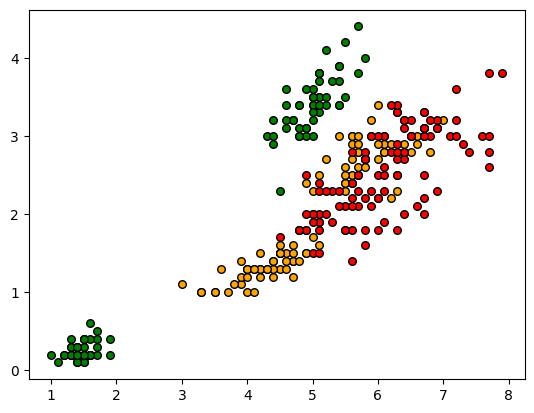

In [214]:
import matplotlib.pyplot as plt
# create new figure
plt.figure() 
# use custom colors
# colors= ['#FF0000', '#00FF00', '#0000FF','#AFAFAF']
colors = ['green', 'orange', 'red']
# draw all data 
for i in range (len(colors)):
    ind = df_iris['label']==i
    plt.scatter(df_iris[ind]['sepal length (cm)'], df_iris[ind]['sepal width (cm)'], c= colors[i], s=30, edgecolor = 'black')
    plt.scatter(df_iris[ind]['petal length (cm)'], df_iris[ind]['petal width (cm)'], c= colors[i], s=30, edgecolor = 'black')